**Signal Denoising....(Continued from previous Lab).**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [ ]:
# Create a signal...
srate = 256 # Hz
t = np.arange(0,3,1/srate)
pnts = len(t)

x = np.sin(2*np.pi*2*t)

noise = 5*np.random.randn(pnts)


NoisySignal = x+noise


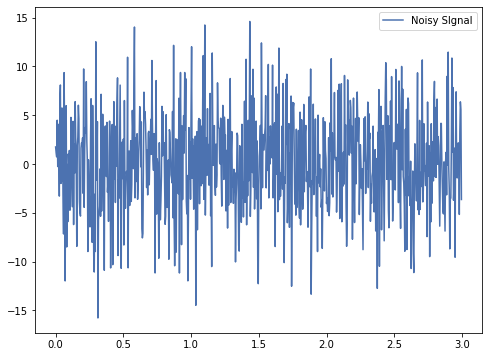

In [ ]:
plt.figure(figsize=(8,6))
style.use('seaborn-deep')

plt.plot(t, NoisySignal, label='Noisy SIgnal')
plt.legend(fontsize=10)
plt.show()



In [ ]:
N = 30  # N = Order of moving average filter. Filter window
        # is actually: (2N+1).
        # Increasing the order of filter will increase the
        # smoothness of filtered signal.
        # window moves by one unit


In [ ]:
S_NS = NoisySignal.shape[0]
print(S_NS)

768


In [ ]:
#Initialize denoised signal...
filt_sig = np.zeros(NoisySignal.shape[0])
# noisy signal's shape wise filter shape

In [ ]:
# Applying moving average filter...
# window moves from the origin, so we added i.
for i in range(0, NoisySignal.shape[0]):
  filt_sig[i] = np.mean(NoisySignal[i:(2*N+1)+i])


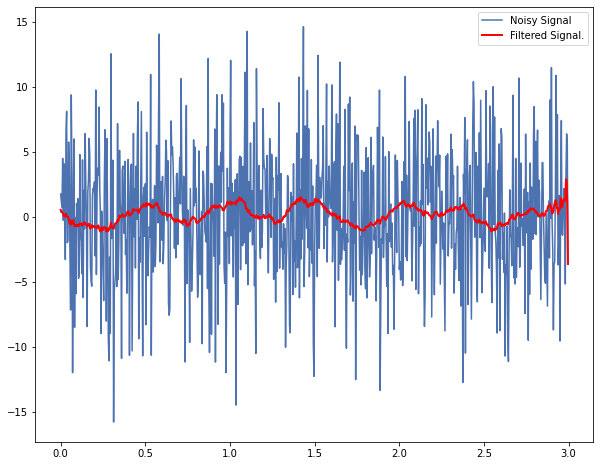

In [ ]:
plt.figure(figsize=(10,8))
style.use('seaborn-deep')

plt.plot(t, NoisySignal, label='Noisy Signal')
plt.plot(t, filt_sig, 'r', linewidth=2, label='Filtered Signal.')

plt.legend(fontsize=10)
plt.show()



**Denoising By Gaussian Mean Filter.**

No skew, min avg max

In [ ]:
# Create a signal...
srate = 512 # Hz
t = np.arange(0,3,1/srate)
pnts = len(t)

x = np.sin(2*np.pi*2*t)

noise = 5*np.random.randn(pnts)


NoisySignal = x+noise


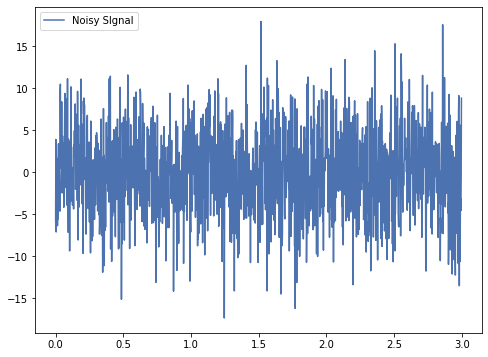

In [ ]:
plt.figure(figsize=(8,6))
style.use('seaborn-deep')

plt.plot(t, NoisySignal, label='Noisy SIgnal')
plt.legend(fontsize=10)
plt.show()

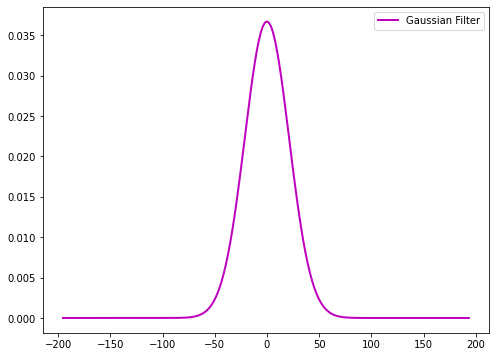

In [ ]:
# Generating Gaussian Kernel/Filter..

N = 100
fwhm = 50  # ms # full-width half-maximum
Gtime = 1000*np.arange(-N,N)/srate
Gfilter = np.exp( -(4*np.log(2)*Gtime**2)/fwhm**2  )
Gfilter = Gfilter/np.sum(Gfilter)  # Normalizing the Gaussian Filter.

# Plotting Gaussian Filter.
plt.figure(figsize=(8,6))
plt.plot(Gtime, Gfilter, 'm', linewidth=2, label='Gaussian Filter')

plt.legend(fontsize=10)
plt.show()

In [ ]:
# Zero Padding...to avoid edge effect.
sig_4_filter = np.concatenate((np.zeros(N), NoisySignal, np.zeros(N)), axis=0   )
K = len(NoisySignal)
timeindex = np.concatenate( (np.arange(-N,0), np.arange(0,K), np.arange(K,K+N)), axis=0 )
time_4_filter = timeindex/srate

In [ ]:
print(len(timeindex))
print(len(sig_4_filter))

1736
1736


In [ ]:
# Initialize the filtered signal..
Gfilt_sig = np.zeros(sig_4_filter.shape[0])

# Applying Gaussian Filter...
for i in range(0, NoisySignal.shape[0]):
  Gfilt_sig[i] = np.sum(sig_4_filter[i:2*N+i]*Gfilter)


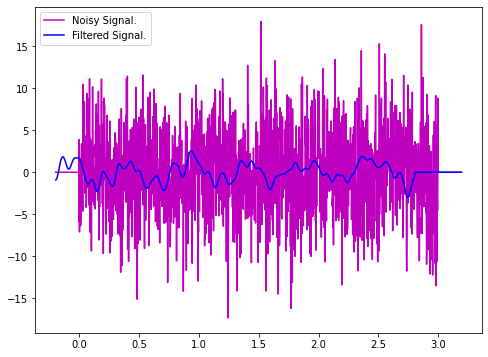

In [ ]:
#Plotting Filtered Signal...
plt.figure(figsize=(8,6))
style.use('seaborn-deep')


plt.plot(time_4_filter, sig_4_filter, 'm-', label='Noisy Signal.')
plt.plot(time_4_filter, Gfilt_sig, 'b-', label='Filtered Signal.')

plt.legend(fontsize=10)
plt.show()
# Guassian filter extracts the sinusoidals in a success manner.

#**Lab task**

---


tune the parameters and process.
signal smooth, non linear kernel/filter add, guassian eqn analysis.

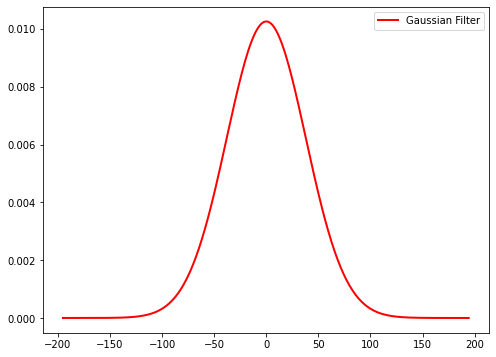

In [ ]:
# Generating Gaussian Kernel/Filter..

N = 200
fwhm = 100  # ms # full-width half-maximum
Gtime = 500*np.arange(-N,N)/srate
Gfilter = np.exp( -(5*np.log(2)*Gtime**2)/fwhm**2  )
Gfilter = Gfilter/np.sum(Gfilter)  # Normalizing the Gaussian Filter.

# Plotting Gaussian Filter.
plt.figure(figsize=(8,6))
plt.plot(Gtime, Gfilter, 'r', linewidth=2, label='Gaussian Filter')

plt.legend(fontsize=10)
plt.show()

In [ ]:
# Zero Padding...to avoid edge effect.
sig_4_filter = np.concatenate((np.zeros(N), NoisySignal, np.zeros(N)), axis=0   )
K = len(NoisySignal)
timeindex = np.concatenate( (np.arange(-N,0), np.arange(0,K), np.arange(K,K+N)), axis=0 )
time_4_filter = timeindex/srate

In [ ]:
# Initialize the filtered signal..
Gfilt_sig = np.zeros(sig_4_filter.shape[0])

# Applying Gaussian Filter...
for i in range(0, NoisySignal.shape[0]):
  Gfilt_sig[i] = np.sum(sig_4_filter[i:2*N+i]*Gfilter)


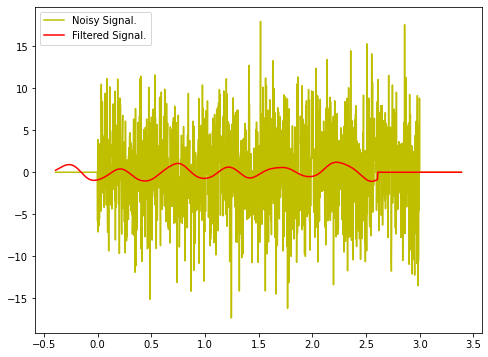

In [ ]:
#Plotting Filtered Signal...
plt.figure(figsize=(8,6))
style.use('seaborn-deep')


plt.plot(time_4_filter, sig_4_filter, 'y', label='Noisy Signal.')
plt.plot(time_4_filter, Gfilt_sig, 'r-', label='Filtered Signal.')

plt.legend(fontsize=10)
plt.show()
# Guassian filter extracts the sinusoidals in a success manner.